In [1]:
import numpy as np
from numpy import pi,sqrt,exp
from scipy.special import erfc
from glob import glob
import matplotlib.pyplot as plt
import os

In [2]:
from params import *

In [3]:
# parent directory
path = os.path.abspath(os.path.join(os.path.abspath('')))

In [4]:
all_files = glob(f'{path}/data/*_R_*000.npz')
all_files.sort()

In [5]:
for i,x in enumerate(all_files):
    print(f"{i:02d} : {x}")

00 : /home/gabriel/Github/SPDE-JKW-Algorithm/data/test_jkw_R_000000.npz
01 : /home/gabriel/Github/SPDE-JKW-Algorithm/data/test_jkw_R_001000.npz


In [6]:
# forcing correlation function in real space
def f_realsp_kernel(x):
    return exp(-.5*x*x/L/L)

# forcing spectrum
def f_fourier_kernel(k):
    return sqrt(2.*pi)*L*exp(-2.*pi*pi*L*L*k*k)

def f_fourier_kernel(k):
    return 1.

## viscous dissipation + ornstein-uhlenbeck damping

# spectrum of solution for ornuhl problem, nonzero modes
def spec_analyt_visc_ornuhl_knonzero(t,k):
    beta = 2.*(4.*pi*pi*nu*k*k+alpha)
    return f_fourier_kernel(k) * (1.-exp(-beta*t)) / beta

def spec_analyt_visc_ornuhl_kzero(t):
    return spec_analyt_visc_ornuhl_knonzero(t,0)

def var_analyt_visc_ornuhl(t,k):
    # depends on the forcing correlation function
    # this is for C_f(x) = e^(-x^2/2 L^2)
    # not implemented
    return 1

## K2 = 1.

def spec_analyt_K2ornuhl_knonzero(t,k):
    beta = 8.*pi*pi*nu+alpha
    return f_fourier_kernel(k) * (1.-exp(-beta*t)) / beta

def spec_analyt_K2ornuhl_kzero(t):
    return spec_analyt_K2ornuhl_knonzero(t,0)

## pure ornstein-uhlenbeck damping, no dissipation

def spec_analyt_ornuhl_knonzero(t,k):
    beta = 8.*pi*pi*nu
    return f_fourier_kernel(k) * (1.-exp(-beta*t)) / beta

def spec_analyt_ornuhl_kzero(t):
    return spec_analyt_ornuhl_knonzero(t,0)

# pure viscous dissipation, no damping

def spec_analyt_visc_knonzero(t,k):
    beta = 8.*pi*pi*nu*k*k
    return f_fourier_kernel(k) * (1.-exp(-beta*t)) / beta

def spec_analyt_visc_kzero(t):
    return f_fourier_kernel(0) * t

# make K2 = 1., turns the problem into pure ornstein-uhlenbeck
# variance does not depend on k, hence we can integrate its asymptotic value
def var_analyt_K2ornuhl(t):
    return .5/(4.*pi*pi*nu+alpha)

def var_analyt_visc(t):
    # depends on the forcing correlation function
    # this is for C_f(x) = e^(-x^2/2 L^2)
    return .5*L*L/nu*(sqrt(1.+4.*nu*t/L/L)-1.)

def var_analyt_visc_ornuhl(t):
    # depends on the forcing correlation function
    # this is for C_f(x) = e^(-x^2/2 L^2)
    ct = exp(.25*L*L*alpha/nu)*.5*L*sqrt(pi/alpha/nu)
    b1 = erfc(.5*L*sqrt(alpha/nu))
    b2 = erfc(.5*sqrt(alpha*(L*L+4.*t*nu)/nu))
    return .5 * ct * (b1-b2)

def var_analyt_visc_ornuhl_asymp():
    # depends on the forcing correlation function
    # this is for C_f(x) = e^(-x^2/2 L^2)
    ct = exp(.25*L*L*alpha/nu)*L*sqrt(pi/alpha/nu)
    b1 = erfc(.5*L*sqrt(alpha/nu))
    return .5 * ct * b1

def velgrad_var_analyt_visc(t):
    # depends on the forcing correlation function
    # this is for C_f(x) = e^(-x^2/2 L^2)
    return .5/nu*(1.-L/sqrt(L*L+4*t*nu))

def velgrad_var_analyt_visc_asymp():
    # depends on the forcing correlation function
    # this is for C_f(x) = e^(-x^2/2 L^2)
    return .5/nu

def velgrad_var_analyt_visc_ornuhl(t):
    # depends on the forcing correlation function
    # this is for C_f(x) = e^(-x^2/2 L^2)
    c1 = .25/nu
    ct = exp(.25*L*L*alpha/nu)*L*sqrt(pi/alpha/nu)
    
    b1 = 2.
    b2 = 2.*exp(-t*alpha)*L/sqrt(L*L+4.*t*nu)
    b3 = ct * erfc(.5*L*sqrt(alpha/nu))
    b4 = ct * erfc(.5*sqrt(alpha*(L*L+4.*t*nu)/nu))
    return c1 * (b1-b2-b3+b4)

def velgrad_var_analyt_visc_ornuhl_asymp():
    # depends on the forcing correlation function
    # this is for C_f(x) = e^(-x^2/2 L^2)
    c1 = .25/nu
    ct = exp(.25*L*L*alpha/nu)*L*sqrt(pi/alpha/nu)
    
    b1 = 2.
    b3 = ct * erfc(.5*L*sqrt(alpha/nu))
    return c1 * (b1-b3)

**Load fields**

In [7]:
# simulation prefix
P = 1

In [8]:
all_files = glob(f'{path}/data/*_R_{P:03d}*.npz')
all_files.sort()

In [9]:
len(all_files)

16

In [10]:
K = np.fft.fftfreq(N) * N

In [11]:
colors = plt.cm.viridis(np.linspace(1,0,10))

**Velocity Profile in Space**

In [12]:
X = np.fft.fftfreq(N) * Ltotal

In [13]:
f = all_files[np.random.randint(len(all_files))]

npzfile = np.load(f)

v_real = npzfile['v_real']

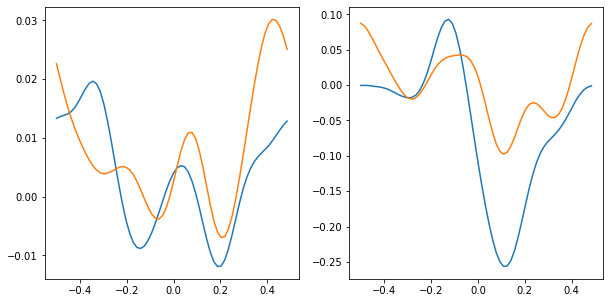

In [14]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

# initial profile of velocity field
axs[0].plot(np.fft.fftshift(X),np.fft.fftshift(np.real(v_real[0,:])))
axs[0].plot(np.fft.fftshift(X),np.fft.fftshift(np.imag(v_real[0,:])))
# final profile of velocity field
axs[1].plot(np.fft.fftshift(X),np.fft.fftshift(np.real(v_real[99,:])))
axs[1].plot(np.fft.fftshift(X),np.fft.fftshift(np.imag(v_real[99,:])))

plt.show()

**Forcing Profile in Space**

In [99]:
X = np.fft.fftfreq(N) * Ltotal

In [66]:
f = all_files[np.random.randint(len(all_files))]

npzfile = np.load(f)

f_real = npzfile['f_real']

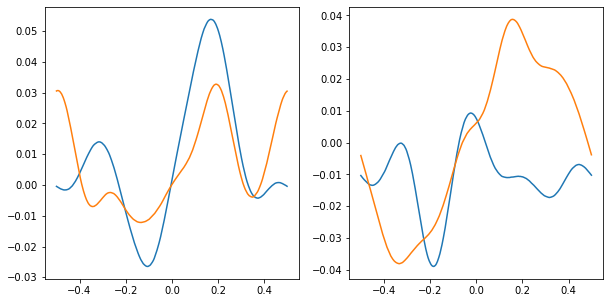

In [67]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

# initial profile of velocity field
axs[0].plot(np.fft.fftshift(X),np.fft.fftshift(np.real(f_real[0,:])))
axs[0].plot(np.fft.fftshift(X),np.fft.fftshift(np.imag(f_real[0,:])))
# final profile of velocity field
axs[1].plot(np.fft.fftshift(X),np.fft.fftshift(np.real(f_real[99,:])))
axs[1].plot(np.fft.fftshift(X),np.fft.fftshift(np.imag(f_real[99,:])))

plt.show()

**Forcing spectrum, time average**

In [68]:
spec_f = np.zeros((N,),dtype=np.float64)

In [69]:
f = all_files[np.random.randint(len(all_files))]
    
npzfile = np.load(f)

f_four = npzfile['f_four']

spec_f = np.mean(np.abs(f_four)**2,axis=0) / N

spec_f_theo = f_fourier_kernel(K)

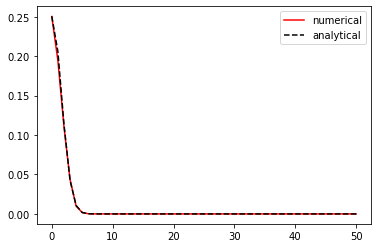

In [70]:
#plt.plot(spec)
scale = 20
plt.plot(K[:N//scale],spec_f[:N//scale], color='red', label='numerical')
plt.plot(K[:N//scale],spec_f_theo[:N//scale], color='k', linestyle='dashed', label='analytical')
plt.legend()
plt.show()

**Forcing spectrum, ensemble average**

In [71]:
spec_f = np.zeros((N,),dtype=np.float64)

In [72]:
for i,f in enumerate(all_files):

    npzfile = np.load(f)

    f_four = npzfile['f_four']

    spec_f += np.mean(np.abs(f_four)**2,axis=0) / N
    
spec_f *= 1./len(all_files)

spec_f_theo = f_fourier_kernel(K)

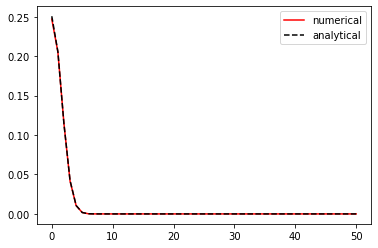

In [73]:
#plt.plot(spec)
scale = 20
plt.plot(K[:N//scale],spec_f[:N//scale], color='red', label='numerical')
plt.plot(K[:N//scale],spec_f_theo[:N//scale], color='k', linestyle='dashed', label='analytical')
plt.legend()
plt.show()

**Forcing correlation function, time average**

In [74]:
corrf_f = np.zeros((N,),dtype=np.float64)
corrf_i = np.zeros((N,),dtype=np.float64)

In [75]:
f = all_files[np.random.randint(len(all_files))]
    
npzfile = np.load(f)

f_real = npzfile['f_real']

for i in range(N):
    corrf_f[i] = np.abs(np.mean( f_real * np.conj(np.roll(f_real,i,axis=1)) ) )
    corrf_i[i] = np.abs(np.mean( f_real * np.roll(f_real,i,axis=1) ) )

corrf_f_theo = f_realsp_kernel(X)

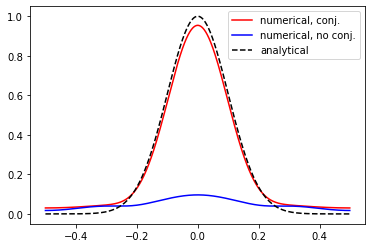

In [76]:
#plt.plot(spec)
scale = 1
plt.plot(np.fft.fftshift(X[:N//scale]),np.fft.fftshift(N*corrf_f[:N//scale]), color='red', label='numerical, conj.')
plt.plot(np.fft.fftshift(X[:N//scale]),np.fft.fftshift(N*corrf_i[:N//scale]), color='blue', label='numerical, no conj.')
plt.plot(np.fft.fftshift(X[:N//scale]),np.fft.fftshift(corrf_f_theo[:N//scale]), color='k', linestyle='dashed', label='analytical')
plt.legend()
plt.show()

**Forcing correlation function, ensemble average**

# TAKES A LOT OF TIME!

In [32]:
corrf_f = np.zeros((N,),dtype=np.float64)
corrf_i = np.zeros((N,),dtype=np.float64)

In [33]:
for i,f in enumerate(all_files):

    npzfile = np.load(f)

    f_real = npzfile['f_real']

    for i in range(N):
        corrf_f[i] += np.abs(np.mean( f_real * np.conj(np.roll(f_real,i,axis=1)) ) )
        corrf_i[i] += np.abs(np.mean( f_real * np.roll(f_real,i,axis=1) ) )
    
corrf_f *= 1./len(all_files)
corrf_i *= 1./len(all_files)

corrf_f_theo = f_realsp_kernel(X)

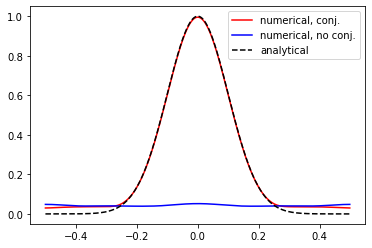

In [34]:
#plt.plot(spec)
scale = 1
plt.plot(np.fft.fftshift(X[:N//scale]),np.fft.fftshift(N*corrf_f[:N//scale]), color='red', label='numerical, conj.')
plt.plot(np.fft.fftshift(X[:N//scale]),np.fft.fftshift(N*corrf_i[:N//scale]), color='blue', label='numerical, no conj.')
plt.plot(np.fft.fftshift(X[:N//scale]),np.fft.fftshift(corrf_f_theo[:N//scale]), color='k', linestyle='dashed', label='analytical')
plt.legend()
plt.show()

**Solution Zero Mode**

In [12]:
spec_zero = np.zeros(N_eval)

In [13]:
taxis = np.arange(N_eval) * dt * N_skip

In [14]:
f = spec_analyt_K2ornuhl_kzero
spec_zero_analyt = f(taxis)

In [15]:
for f in all_files:
    
    npzfile = np.load(f)

    v_four = npzfile['v_four']
    
    spec_zero += np.abs(v_four[:,0])**2 / N
    
spec_zero *= 1./len(all_files)

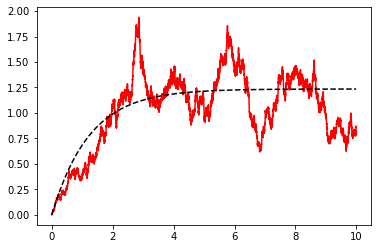

In [16]:
plt.plot(taxis,N*spec_zero,color='r')
plt.plot(taxis,spec_zero_analyt,color='k',linestyle='dashed')
plt.show()

**Solution Other Modes**

In [22]:
spec_knonzero = np.zeros(N_eval)

In [23]:
f  = spec_analyt_K2ornuhl_knonzero
k0 = 1
spec_knonzero_analyt = f(taxis,k0)

In [24]:
for f in all_files:
    
    npzfile = np.load(f)

    v_four = npzfile['v_four']
    
    spec_knonzero += np.abs(v_four[:,k0])**2 / N
    
spec_knonzero *= 1./len(all_files)

In [25]:
taxis = np.arange(N_eval) * dt * N_skip

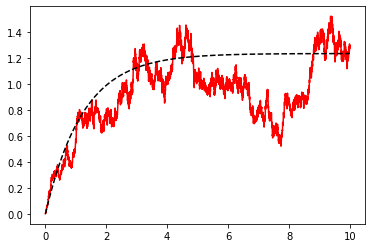

In [28]:
plt.plot(taxis,N*spec_knonzero,color='r')
plt.plot(taxis,spec_knonzero_analyt,color='k',linestyle='dashed')
plt.show()

**Solution spectrum**

In [26]:
spec = np.zeros((10,N,),dtype=np.float64)

In [27]:
for f in all_files:
    
    npzfile = np.load(f)

    #v_real = npzfile['v_real']
    v_four = npzfile['v_four']

    spec[0,:] += np.abs(v_four[           0,:])**2 / N
    spec[1,:] += np.abs(v_four[1*N_eval//10,:])**2 / N
    spec[2,:] += np.abs(v_four[2*N_eval//10,:])**2 / N
    spec[3,:] += np.abs(v_four[3*N_eval//10,:])**2 / N
    spec[4,:] += np.abs(v_four[4*N_eval//10,:])**2 / N
    spec[5,:] += np.abs(v_four[5*N_eval//10,:])**2 / N
    spec[6,:] += np.abs(v_four[6*N_eval//10,:])**2 / N
    spec[7,:] += np.abs(v_four[7*N_eval//10,:])**2 / N
    spec[8,:] += np.abs(v_four[8*N_eval//10,:])**2 / N
    spec[9,:] += np.abs(v_four[9*N_eval//10,:])**2 / N
    
spec *= 1./len(all_files)

In [28]:
K = np.fft.fftfreq(N) * N

In [29]:
spec_analyt_list = np.empty((10,N),dtype=np.float64)

#spec_analyt = spec_analyt_ornuhl_knonzero
#spec_analyt = spec_analyt_visc_knonzero
#spec_analyt  = spec_analyt_visc_ornuhl_knonzero
spec_analyt = spec_analyt_K2ornuhl_knonzero

with np.errstate(divide='ignore', invalid='ignore'):
    spec_analyt_list[0,:] = spec_analyt(0,K)
    spec_analyt_list[1,:] = spec_analyt(1*N_eval//10*dt*N_skip,K)
    spec_analyt_list[2,:] = spec_analyt(2*N_eval//10*dt*N_skip,K)
    spec_analyt_list[3,:] = spec_analyt(3*N_eval//10*dt*N_skip,K)
    spec_analyt_list[4,:] = spec_analyt(4*N_eval//10*dt*N_skip,K)
    spec_analyt_list[5,:] = spec_analyt(5*N_eval//10*dt*N_skip,K)
    spec_analyt_list[6,:] = spec_analyt(6*N_eval//10*dt*N_skip,K)
    spec_analyt_list[7,:] = spec_analyt(7*N_eval//10*dt*N_skip,K)
    spec_analyt_list[8,:] = spec_analyt(8*N_eval//10*dt*N_skip,K)
    spec_analyt_list[9,:] = spec_analyt(9*N_eval//10*dt*N_skip,K)

#spec_analyt = spec_analyt_ornuhl_kzero
#spec_analyt = spec_analyt_visc_kzero
#spec_analyt  = spec_analyt_visc_ornuhl_kzero
spec_analyt = spec_analyt_K2ornuhl_kzero

spec_analyt_list[0,0] = spec_analyt(0)
spec_analyt_list[1,0] = spec_analyt(1*N_eval//10*dt*N_skip)
spec_analyt_list[2,0] = spec_analyt(2*N_eval//10*dt*N_skip)
spec_analyt_list[3,0] = spec_analyt(3*N_eval//10*dt*N_skip)
spec_analyt_list[4,0] = spec_analyt(4*N_eval//10*dt*N_skip)
spec_analyt_list[5,0] = spec_analyt(5*N_eval//10*dt*N_skip)
spec_analyt_list[6,0] = spec_analyt(6*N_eval//10*dt*N_skip)
spec_analyt_list[7,0] = spec_analyt(7*N_eval//10*dt*N_skip)
spec_analyt_list[8,0] = spec_analyt(8*N_eval//10*dt*N_skip)
spec_analyt_list[9,0] = spec_analyt(9*N_eval//10*dt*N_skip)

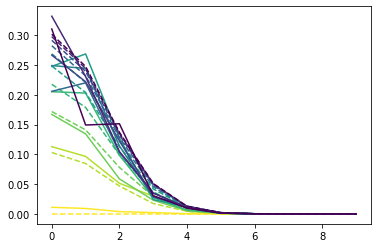

In [30]:
#plt.plot(spec)
scale = N//10
for i in range(10):
    plt.plot(K[:N//scale],spec[i,:N//scale],color=colors[i])
    plt.plot(K[:N//scale],spec_analyt_list[i,:N//scale],color=colors[i],linestyle='dashed')
plt.show()

**Variance in Time**

In [31]:
var = np.zeros((N_eval,))

In [32]:
for f in all_files:
    
    npzfile = np.load(f)

    v_real = npzfile['v_real']
    
    var += np.mean( np.abs(v_real)**2, axis=1 )
    
var *= N/len(all_files)

In [33]:
#var_analyt = var_analyt_visc
var_analyt = var_analyt_visc_ornuhl

var_theo = var_analyt(np.arange(N_eval)*dt*N_skip)

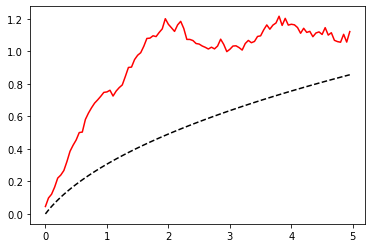

In [34]:
plt.plot(t_eval, var, color='red', label='numerical')
plt.plot(t_eval, var_theo, color='k', linestyle='dashed', label='analytical')
plt.show()

**Velocity Gradient Variance in Time**

In [35]:
velgrad_var_npgrad = np.zeros((N_eval,))
velgrad_var_npfft  = np.zeros((N_eval,))

In [36]:
for f in all_files:
    
    npzfile = np.load(f)

    v_real = npzfile['v_real']
    v_four = npzfile['v_four']
    
    velgrad_var_npgrad += np.mean( np.abs(np.gradient(v_real, dx, axis=1))**2, axis=1 )
    velgrad_var_npfft  += np.mean( np.abs( np.fft.ifft(2*pi*1j*K*v_four) )**2, axis=1 )

velgrad_var_npgrad *= N/len(all_files)
velgrad_var_npfft  *= N/len(all_files)

In [37]:
#velgrad_var_analyt = velgrad_var_analyt_visc
velgrad_var_analyt = velgrad_var_analyt_visc_ornuhl

velgrad_var_theo = velgrad_var_analyt(np.arange(N_eval)*dt*N_skip)

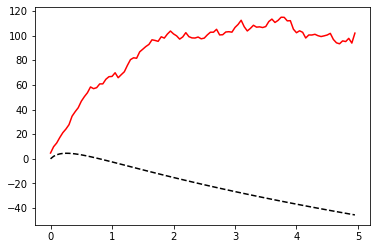

In [38]:
plt.plot(t_eval, velgrad_var_npgrad, color='red', label='numerical, Grad')
#plt.plot(t_eval, velgrad_var_npfft , color='blue', label='numerical, DFT')
plt.plot(t_eval, velgrad_var_theo, color='k', linestyle='dashed', label='analytical')
#plt.axhline(y=velgrad_var_analyt_visc_asymp(), color='grey', linestyle='dashed')
plt.show()

**Dealias Algorithm**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft,ifft,fftfreq

In [7]:
N = 256

In [13]:
# Gets v in Fourier space
# Returns FFT(u^2) dealised where u = IFFT(v)
def Dealias(v0,q):

    M = N//2*q

    vpad  = np.zeros(M,dtype=np.complex128)

    vpad[0:N//2] = v0[0:N//2]
    vpad[M-N//2:M] = v0[N//2:]

    vpad  = fft( ifft(vpad)**2 )
    vpad *= M/N

    vf = np.zeros(N,dtype=np.complex128)
    vf[0:N//2] = vpad[0:N//2]
    vf[N//2:]    = vpad[M-N//2:M]

    return vf

In [43]:
v0 = np.random.normal(size=N) + 1j * np.random.normal(size=N)
#v0 = np.sin(4.*2.*np.pi*np.arange(N)/N)

In [44]:
v2 = Dealias(v0,3)

In [51]:
v3 = Dealias(v0,9)

In [52]:
v1 = fft(ifft(v0)**2)

In [53]:
np.allclose(v2,v3)

True

In [54]:
np.allclose(v1,v2)

False

In [55]:
np.allclose(v1,v3)

False

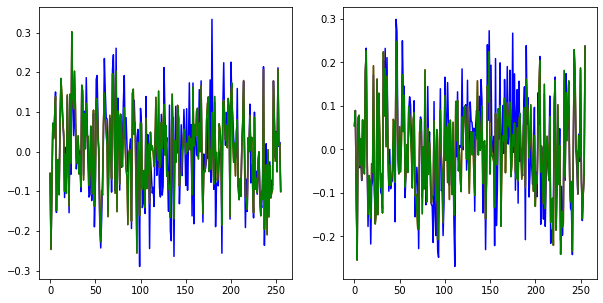

In [56]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(np.real(v1),color='blue')
ax[0].plot(np.real(v2),color='red')
ax[0].plot(np.real(v3),color='green')

ax[1].plot(np.imag(v1),color='blue')
ax[1].plot(np.imag(v2),color='red')
ax[1].plot(np.imag(v3),color='green')

plt.show()

# The SDE

In [196]:
import numpy as np
from numpy import pi,sqrt,exp
import matplotlib.pyplot as plt
from params import *

In [197]:
beta = 2*(visc+alpha)
def var(t):
    return ( 1. - exp( - beta * t ) ) / beta

In [207]:
Ttotal=10.

In [208]:
taxis = np.linspace(0.,Ttotal,num=N_eval)

In [218]:
f = np.load('data/test_sde_R_001000.npz')

In [219]:
f0 = f['f_all']

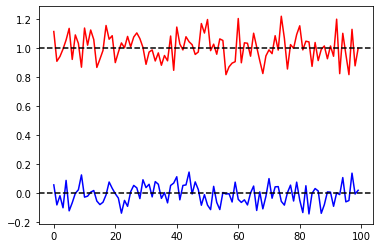

In [220]:
plt.plot( np.mean(f0,axis=1), color='b')
plt.axhline(y=0, color='k', linestyle='dashed')
plt.plot( np.mean(f0**2,axis=1), color='r')
plt.axhline(y=1., color='k', linestyle='dashed')
plt.show()

In [221]:
v0 = f['v_all']

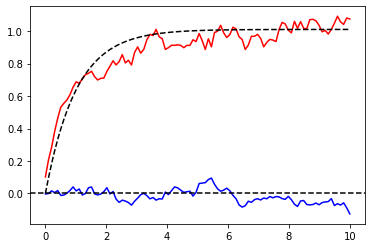

In [222]:
plt.plot( taxis, np.mean(v0,axis=1), color='b')
plt.axhline(y=0, color='k', linestyle='dashed')
plt.plot( taxis, np.mean(v0**2,axis=1), color='r')
#plt.axhline(y=1., color='k', linestyle='dashed')
plt.plot( taxis, var(taxis), color='k', linestyle='dashed')
plt.show()

# Test Statistics Dealias

Create an ensemble of 1d random fields u, independent, correlated in space in the same manner

Then run the dealias algorithm to get u^2 for each of them

Then calculate its statistics and compare with the predictions. It's easy to obtain results, since u is Gaussian.

In [1]:
import numpy as np
from numpy import pi,sqrt,exp
import matplotlib.pyplot as plt
from params import *

In [2]:
f = np.load('data/test_dealias_R_000000.npz')

In [3]:
v0 = f['v_real']

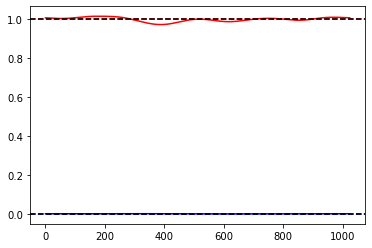

In [4]:
# mean
plt.plot( np.mean(np.real(v0),axis=0), color='b' )
plt.axhline(y=np.real(np.mean(v0)), color='b', linestyle='dashed' )
plt.axhline(y=0., color='k', linestyle='dashed' )
# variance
plt.plot( N*np.mean(np.real(v0)**2,axis=0), color='r' )
plt.axhline(y=N*np.mean(np.abs(v0)**2), color='r', linestyle='dashed' )
plt.axhline(y=1., color='k', linestyle='dashed' )
plt.show()

In [5]:
v0 = f['v_four']

In [6]:
# forcing correlation function in real space
def f_realsp_kernel(x):
    return exp(-.5*x*x/L/L)

# forcing spectrum
def f_fourier_kernel(k):
    return sqrt(2.*pi)*L*exp(-2.*pi*pi*L*L*k*k)

In [7]:
K = np.fft.fftfreq(N) * N

In [8]:
spec = np.mean( np.abs(v0)**2, axis=0 ) / N
spec_analyt = f_fourier_kernel(K)

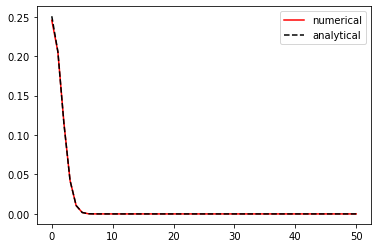

In [9]:
#plt.plot(spec)
scale = 20
plt.plot(K[:N//scale],spec[:N//scale], color='red', label='numerical')
plt.plot(K[:N//scale],spec_analyt[:N//scale], color='k', linestyle='dashed', label='analytical')
plt.legend()
plt.show()

In [10]:
v2 = f['v2_real']

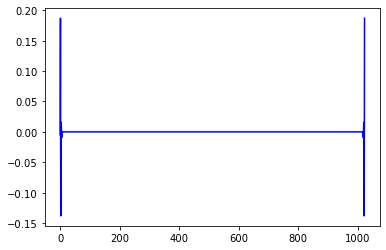

In [11]:
plt.plot( np.mean(np.real(v0),axis=0), color='b')
#plt.axhline(y=1., color='k', linestyle='dashed')
#plt.plot( np.mean(np.abs(v0)**2,axis=0), color='r')
#plt.axhline(y=1., color='k', linestyle='dashed')
plt.show()

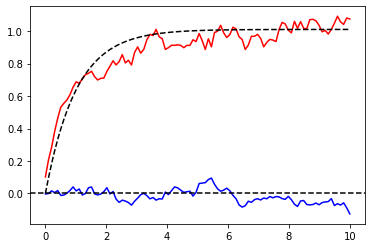

In [222]:
plt.plot( taxis, np.mean(v0,axis=1), color='b')
plt.axhline(y=0, color='k', linestyle='dashed')
plt.plot( taxis, np.mean(v0**2,axis=1), color='r')
#plt.axhline(y=1., color='k', linestyle='dashed')
plt.plot( taxis, var(taxis), color='k', linestyle='dashed')
plt.show()